<a href="https://colab.research.google.com/github/rashmi05pathak/CS6910_Assignment1/blob/main/EE20S051_CS21M050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#****PLease mount the drive according to your PRML folder location
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset_training1 = pd.read_csv(str_path+'PRML/IITM/Question1/Train_Dataset1.csv',header = None)

In [ ]:
dataset_training2 = pd.read_csv(str_path+'PRML/IITM/Question1/Train_Dataset2.csv',header = None)

In [ ]:
dataset_training1_arr = dataset_training1.to_numpy()

In [ ]:
dataset_training2_arr = dataset_training2.to_numpy()

In [ ]:
dataset_training1_arr.shape

(1000, 2)

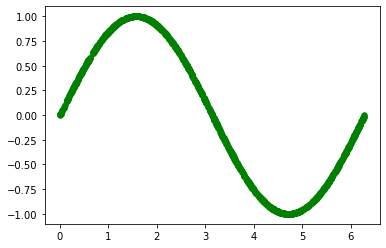

In [ ]:
#Q1(a)****Plotting dataset 1********#
plt.scatter(dataset_training1_arr[:,0], dataset_training1_arr[:,1], color = "g",marker = "o", s = 30)

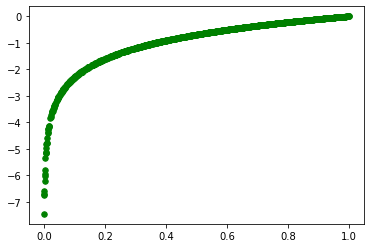

In [ ]:
#Q1(b)Plotting Dataset2********# 
plt.scatter(dataset_training2_arr[:,0],dataset_training2_arr[:,1],color = "g",marker = "o", s = 30)

In [ ]:
#Test data
dataset_testing1 = pd.read_csv(str_path+'PRML/IITM/Question1/Test_Dataset1.csv',header = None)
dataset_testing2 = pd.read_csv(str_path+'PRML/IITM/Question1/Test_Dataset2.csv',header = None)

In [ ]:
dataset_testing1_arr = dataset_testing1.to_numpy()
dataset_testing2_arr = dataset_testing2.to_numpy()

In [ ]:
dataset_training2_arr.shape

(1000, 2)

In [ ]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [ ]:
#Initialize the model’s parameters
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2) # we set up a seed so that output matches
    #Weight and bias 
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)* 0.01
    b2 = np.zeros((n_y,1))
    #print(W1,b1,W2,b2)
    parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    return parameters

In [ ]:
def forward_propagation(X, parameters): 
    # Retrieve each parameter from the dictionary "parameters" 
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    # Implement Forward Propagation to calculate A2
    Z1 = np.dot(W1,X)+b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2,A1)+b2 
    A2 = Z2
    cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
    return A2, cache

In [ ]:
#implement mean squared error as output is real number
def mean_squared_error(y_true,y_pred):
    length = y_pred.shape[0]
    sum_error = 0
    for i in range(length):
        sum_error = sum_error + ((y_pred[i] - y_true[i])**2)
    return sum_error/length

In [ ]:
#Notation used meaning is as below
#dW1 = ∂J/∂W1
#db1 = ∂J/∂b1
#dW2 = ∂J/∂W2
#db2 = ∂J/∂b2
#A1*(1 - A1) is differentiation of sigmoid function
# Implementing backward_propagation
def backward_propagation(parameters, cache, X, Y):
   # m = 1 #one dimensional data
    # First, retrieve W1 and W2 from the dictionary "parameters". 
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    # Backward propagation: calculate dW1, db1, dW2, db2.
    dZ2 = A2-Y
    dW2 = np.dot(dZ2,A1.T)
    db2 = np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2)*A1*(1 - A1) #sigmoid as activation function at hidden layer
    dW1 = np.dot(dZ1,X.T)
    db1 = np.sum(dZ1,axis=1,keepdims=True)
    grads = {"dW1": dW1,"db1": db1,"dW2": dW2,"db2": db2}
    return grads

In [ ]:
def update_parameters(parameters, grads, learning_rate): 
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"] 
    db2 = grads["db2"]
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    return parameters

In [ ]:
#****Neural Network method***********#
def nn_model(X, Y, n_h, num_iterations,learning_rate): 
    np.random.seed(3)
    parameters = initialize_parameters(1, n_h, 1) 
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"] 
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        for x,y in zip(X,Y):
            A2, cache = forward_propagation(x, parameters)
            grads = backward_propagation(parameters, cache, x, y)
            # Gradient descent parameter update.
            parameters = update_parameters(parameters, grads,learning_rate) 
    return parameters

In [ ]:
def predict(parameters,X):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"] 
    A2, cache = forward_propagation(X, parameters)
    return A2

In [ ]:
#*****Commenting the code as it's running time is approx. 20 min after that it will give the best parameter for minimum loss
#******Tuning Hidden layer and learning rate for Dataset1 ***********************#
#hidden_layer_sizes = [x for x in range(1,50)]
#learning_rate = [0.001,0.01,0.1,1.0]
#best_result = []
#min_loss = 10#Assuming minimum loss to start with
#for i, n_h in enumerate(hidden_layer_sizes):
  #for j,lr in enumerate(learning_rate):
      #parameters = nn_model(dataset_training1_arr[:,0], dataset_training1_arr[:,1], n_h, 100,lr) 
      #length = dataset_training1_arr.shape[0]
      #output_prediction_arr = np.zeros(length)
      #for i in range(length):
          #output_prediction_arr[i] = predict(parameters,dataset_training1_arr[i,0])
      #loss = mean_squared_error(dataset_training1_arr[:,1],output_prediction_arr)
      #if(loss<min_loss):
        #min_loss = loss
        #best_result.clear()
        #best_result.append("Loss for {} hidden units {} learning rate: {} %".format(n_h,lr,loss))
      #print ("Loss for {} hidden units {} learning rate: {} %".format(n_h,lr,loss))

Loss for 1 hidden units 0.001 learning rate: 0.1588531121822333 %
Loss for 1 hidden units 0.01 learning rate: 0.07251820982537349 %
Loss for 1 hidden units 0.1 learning rate: 0.06671285862166351 %
Loss for 1 hidden units 1.0 learning rate: 0.3698348908112 %
Loss for 2 hidden units 0.001 learning rate: 0.17624835389694843 %
Loss for 2 hidden units 0.01 learning rate: 0.03872547441218037 %
Loss for 2 hidden units 0.1 learning rate: 0.036100924545429784 %
Loss for 2 hidden units 1.0 learning rate: 0.13041488649218916 %
Loss for 3 hidden units 0.001 learning rate: 0.18407410882595457 %
Loss for 3 hidden units 0.01 learning rate: 0.022029201187955507 %
Loss for 3 hidden units 0.1 learning rate: 0.00024698152955478534 %
Loss for 3 hidden units 1.0 learning rate: 0.4540550447814892 %
Loss for 4 hidden units 0.001 learning rate: 0.1822856655932304 %
Loss for 4 hidden units 0.01 learning rate: 0.022095689389607535 %
Loss for 4 hidden units 0.1 learning rate: 0.0006372851591981716 %
Loss for 4 h

In [ ]:
#best_result

['Loss for 5 hidden units 0.1 learning rate: 0.00017106949826036343 %']

In [ ]:
#parameters1 = nn_model(dataset_training1_arr[:,0], dataset_training1_arr[:,1],41,100,0.1)
parameters1 = nn_model(dataset_training1_arr[:,0], dataset_training1_arr[:,1],5,100,0.1)

In [ ]:
#Q1(d)Training loss
length = dataset_training1_arr.shape[0]
output_prediction_train = np.zeros(length)
for i in range(length):
    output_prediction_train[i] = predict(parameters1,dataset_training1_arr[i,0])
mean_squared_error(dataset_training1_arr[:,1],output_prediction_train)

0.00017106949826036343

In [ ]:
length = dataset_testing1_arr.shape[0]
output_prediction_arr1 = np.zeros(length)

In [ ]:
for i in range(length):
    output_prediction_arr1[i] = predict(parameters1,dataset_testing1_arr[i,0])

In [ ]:
#output_prediction_arr
#output_prediction_arr

In [ ]:
#Q1(d) Dataset1 Test loss
loss1 = mean_squared_error(dataset_testing1_arr[:,1],output_prediction_arr1)

In [ ]:
loss1

0.00016598034303931655

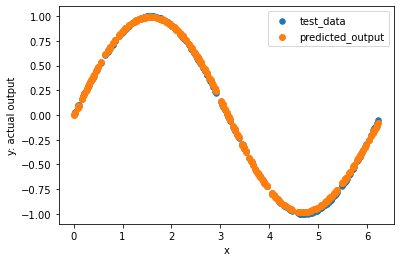

In [ ]:
  # Q1(b)plotting regression curve
# plotting the actual points as scatter plot
plt.scatter(dataset_testing1_arr[:,0], dataset_testing1_arr[:,1],marker = "o", s = 30)
# plotting the regression line
plt.scatter(dataset_testing1_arr[:,0], output_prediction_arr1)
# putting labels
plt.xlabel('x')
plt.ylabel('y: actual output')
# function to show plot
plt.legend(['test_data','predicted_output'])
plt.show()

In [ ]:
#output_prediction_arr

In [ ]:
#COmmenting the code as the runtime of this section is approx. 25 min, it is used for hyperparameter tuning
#******Tuning Hidden layer and learning rate for Dataset2 ***********************#
#plt.figure(figsize=(16, 32))
#hidden_layer_sizes = [x for x in range(1,50)]
#learning_rate = [(0.1*x) for x in range(1,10)]
#best_result2 = []
#min_loss2 = 10
#for i, n_h in enumerate(hidden_layer_sizes):
    #for j,lr in enumerate(learning_rate):
        #parameters = nn_model(dataset_training2_arr[:,0], dataset_training2_arr[:,1], n_h, 100,lr) 
        #length = dataset_training2_arr.shape[0]
        #output_prediction_arr = np.zeros(length)
        #for i in range(length):
            #output_prediction_arr[i] = predict(parameters,dataset_training2_arr[i,0])
        #loss = mean_squared_error(output_prediction_arr,dataset_training2_arr[:,1])
       # if(loss<min_loss2):
          # min_loss2 = loss
           #best_result2.clear()
          # best_result2.append("Loss for {} hidden units {} learning rate: {} %".format(n_h,lr,loss))
       # print ("Loss for {} hidden units {} learning rate: {} %".format(n_h,lr,loss))

Loss for 1 hidden units 0.1 learning rate: 0.10177648067413682 %
Loss for 1 hidden units 0.2 learning rate: 0.11408144280250901 %
Loss for 1 hidden units 0.30000000000000004 learning rate: 0.12376470907296219 %
Loss for 1 hidden units 0.4 learning rate: 0.13314243810219964 %
Loss for 1 hidden units 0.5 learning rate: 0.14694012790519537 %
Loss for 1 hidden units 0.6000000000000001 learning rate: 0.1749776272172159 %
Loss for 1 hidden units 0.7000000000000001 learning rate: 0.24178689540826065 %
Loss for 1 hidden units 0.8 learning rate: 0.3411600549189607 %
Loss for 1 hidden units 0.9 learning rate: 0.5104988116066785 %
Loss for 2 hidden units 0.1 learning rate: 0.027905875023281495 %
Loss for 2 hidden units 0.2 learning rate: 0.019602901375063552 %
Loss for 2 hidden units 0.30000000000000004 learning rate: 0.01755291500102019 %
Loss for 2 hidden units 0.4 learning rate: 0.01959630927966033 %
Loss for 2 hidden units 0.5 learning rate: 0.02420354510564637 %
Loss for 2 hidden units 0.600

In [ ]:
#best_result2

['Loss for 34 hidden units 0.5 learning rate: 0.015616073633121995 %']

In [ ]:
#From tuning of parameters got number of hidden layers as 6, learning rate as 0.2
parameters2 = nn_model(dataset_training2_arr[:,0], dataset_training2_arr[:,1], 34, 100,0.5) 

In [ ]:
#Q1(d)Training loss for Dataset2
length = dataset_training2_arr.shape[0]
output_prediction_train2 = np.zeros(length)
for i in range(length):
    output_prediction_train2[i] = predict(parameters2,dataset_training2_arr[i,0])
mean_squared_error(dataset_training2_arr[:,1],output_prediction_train2)

0.015616073633121995

In [ ]:
length = dataset_testing2_arr.shape[0]
output_prediction_arr2 = np.zeros(length)
#plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y) 
for i in range(length):
    output_prediction_arr2[i] = predict(parameters2,dataset_testing2_arr[i,0])

In [ ]:
#Q1(d) Test loss for dataset2
mean_squared_error(dataset_testing2_arr[:,1],output_prediction_arr2)

0.0007775946848879148

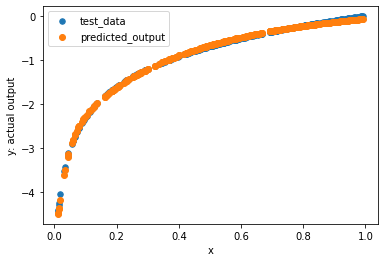

In [ ]:
  #Q1(C)plotting regression curve
# plotting the actual points as scatter plot
plt.scatter(dataset_testing2_arr[:,0], dataset_testing2_arr[:,1],marker = "o", s = 30)
# plotting the regression line
plt.scatter(dataset_testing2_arr[:,0], output_prediction_arr2)
# putting labels
plt.xlabel('x')
plt.ylabel('y: actual output')
plt.legend(['test_data','predicted_output'])
# function to show plot
plt.show()